In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


hdata = pd.read_csv('world_happiness_report_2020.csv')

df = pd.DataFrame(hdata)

df



,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.8087,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445
1,Denmark,Western Europe,7.6456,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489
2,Switzerland,Western Europe,7.5599,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728
3,Iceland,Western Europe,7.5045,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710
4,Norway,Western Europe,7.4880,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218
...,...,...,...,...,...,...,...,...,...
148,Central African Republic,Sub-Saharan Africa,3.4759,6.625160,0.319460,45.200001,0.640881,0.082410,0.891807
149,Rwanda,Sub-Saharan Africa,3.3123,7.600104,0.540835,61.098846,0.900589,0.055484,0.183541
150,Zimbabwe,Sub-Saharan Africa,3.2992,7.865712,0.763093,55.617260,0.711458,-0.072064,0.810237
151,South Sudan,Sub-Saharan Africa,2.8166,7.425360,0.553707,51.000000,0.451314,0.016519,0.763417


# Two Statistical Summaries 

In [10]:
#Stats on healthy life expectancy 

life_expect = happydf_sort.groupby(["Healthy life expectancy", 'Country name',])["Healthy life expectancy"].sum()
print(life_expect.head(5))
print(life_expect.tail(5))

df["Healthy life expectancy"].describe()




Healthy life expectancy  Country name            
45.200001                Central African Republic    45.200001
48.003624                Lesotho                     48.003624
48.220539                Chad                        48.220539
49.503773                Ivory Coast                 49.503773
49.861908                Nigeria                     49.861908
Name: Healthy life expectancy, dtype: float64
Healthy life expectancy  Country name             
74.102448                Switzerland                  74.102448
74.402710                Spain                        74.402710
75.000969                Japan                        75.000969
76.771706                Hong Kong S.A.R. of China    76.771706
76.804581                Singapore                    76.804581
Name: Healthy life expectancy, dtype: float64


count    153.000000
mean      64.445529
std        7.057848
min       45.200001
25%       58.961712
50%       66.305145
75%       69.289192
max       76.804581
Name: Healthy life expectancy, dtype: float64

In [11]:
#Country with highest and lowest GDPs by country and as a whole

happydf_sort = df.sort_values(by= "Logged GDP per capita", ascending = False)
gdp = happydf_sort.groupby(["Logged GDP per capita", 'Country name',])["Logged GDP per capita"].sum()
print(gdp.head(5))
print(gdp.tail(5))

df["Logged GDP per capita"].describe()

Logged GDP per capita  Country name            
6.492642               Burundi                     6.492642
6.625160               Central African Republic    6.625160
6.694256               Congo (Kinshasa)            6.694256
6.842167               Niger                       6.842167
7.054380               Liberia                     7.054380
Name: Logged GDP per capita, dtype: float64
Logged GDP per capita  Country name        
11.089825              Kuwait                  11.089825
11.109999              United Arab Emirates    11.109999
11.160978              Ireland                 11.160978
11.395521              Singapore               11.395521
11.450681              Luxembourg              11.450681
Name: Logged GDP per capita, dtype: float64


count    153.000000
mean       9.295706
std        1.201588
min        6.492642
25%        8.350645
50%        9.456313
75%       10.265124
max       11.450681
Name: Logged GDP per capita, dtype: float64

# Analyses of Patterns and Relationships 

In [159]:
#Comparing top 15 and bottom 15 overall happiness scores with perceptions of corruption

happy_ratings = happydf_sort.groupby(["Ladder score", "Regional indicator"])["Perceptions of corruption"].value_counts()
print(happy_ratings.head(15))
print(happy_ratings.tail(15))




Ladder score  Regional indicator            Perceptions of corruption
2.5669        South Asia                    0.933687                     1
2.8166        Sub-Saharan Africa            0.763417                     1
3.2992        Sub-Saharan Africa            0.810237                     1
3.3123        Sub-Saharan Africa            0.183541                     1
3.4759        Sub-Saharan Africa            0.891807                     1
3.4762        Sub-Saharan Africa            0.619799                     1
3.4789        Sub-Saharan Africa            0.777931                     1
3.5274        Middle East and North Africa  0.800288                     1
3.5380        Sub-Saharan Africa            0.731701                     1
3.5733        South Asia                    0.772043                     1
3.6528        Sub-Saharan Africa            0.857392                     1
3.7208        Latin America and Caribbean   0.684767                     1
3.7594        Sub-Saharan Afri

In [160]:
# Relation of social support and life expectancy to overall happiness (ladder score)


life_data = df.groupby(["Social support","Country name", "Healthy life expectancy"])["Ladder score"].value_counts()

print(life_data.head(20))
print(life_data.tail(20))




Social support  Country name              Healthy life expectancy  Ladder score
0.319460        Central African Republic  45.200001                3.4759          1
0.468671        Benin                     54.312466                5.2160          1
0.470367        Afghanistan               52.590000                2.5669          1
0.490326        Burundi                   53.400002                3.7753          1
0.540835        Rwanda                    61.098846                3.3123          1
0.544007        Malawi                    57.592888                3.5380          1
0.551313        Togo                      54.719898                4.1872          1
0.553707        South Sudan               51.000000                2.8166          1
0.592201        India                     60.215187                3.5733          1
0.592628        Morocco                   65.896240                5.0948          1
0.593248        Haiti                     55.598625                3.7

# Data Visualizations

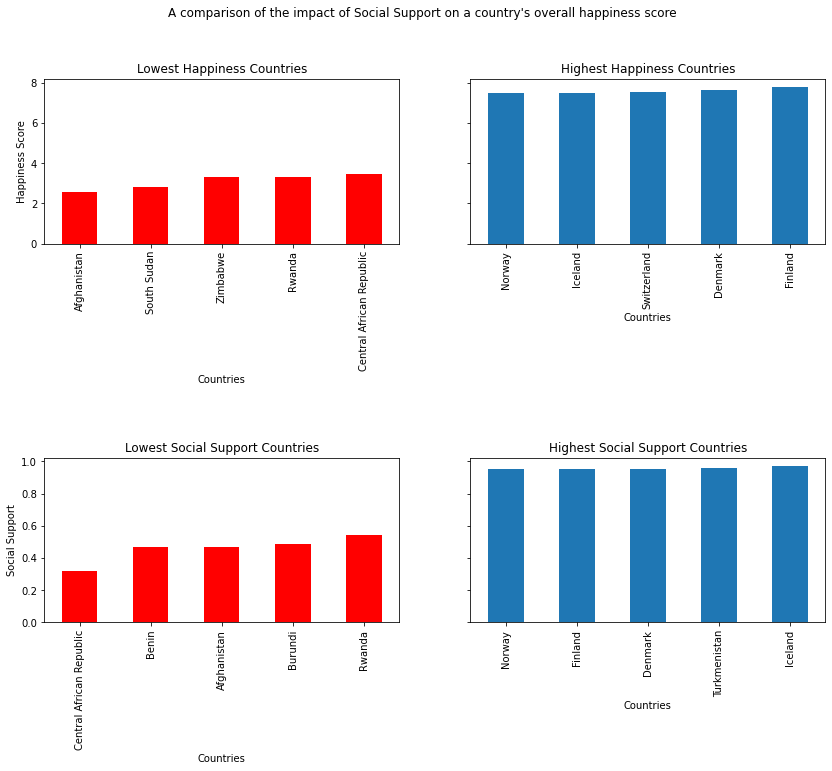

In [123]:

#social support and happiness data


# data for high and low happiness of all countries
life_data = df.groupby(["Country name"])["Ladder score"].sum()
ldata_sort = life_data.sort_values()
bottom = ldata_sort.head(5)
top = ldata_sort.tail(5)


#data for social support on all countires
support = df.groupby(["Country name"])["Social support"].sum()
support_sort = support.sort_values()
bottom1 = support_sort.head(5)
top1 = support_sort.tail(5)




fig, axes = plt.subplots(nrows=2, ncols=2, figsize= (14,10), sharey='row')
fig.suptitle("A comparison of the impact of Social Support on a country's overall happiness score")


#top two subplots 
bottom.plot(ax=axes[0,0], kind = 'bar', label="Lowest", color = 'r')
axes[0, 0].set_title('Lowest Happiness Countries')
axes[0, 0].set(xlabel="Countries", ylabel="Happiness Score")

top.plot(ax=axes[0,1], kind = 'bar', label="Highest", sharey = 'row')
axes[0, 1].set_title('Highest Happiness Countries')
axes[0, 1].set(xlabel="Countries", ylabel="Happiness Score")

#bottom two subplots to tie the connection
bottom1.plot(ax=axes[1,0], kind = 'bar', label="Lowest", color = 'r')
axes[1,0].set_title('Lowest Social Support Countries')
axes[1,0].set(xlabel="Countries", ylabel="Social Support")


top1.plot(ax=axes[1,1], kind = 'bar', label="Highest" )
axes[1, 1].set_title('Highest Social Support Countries')
axes[1, 1].set(xlabel="Countries", ylabel="Social Support")



fig.subplots_adjust(hspace = 1.3)
 
plt.show()

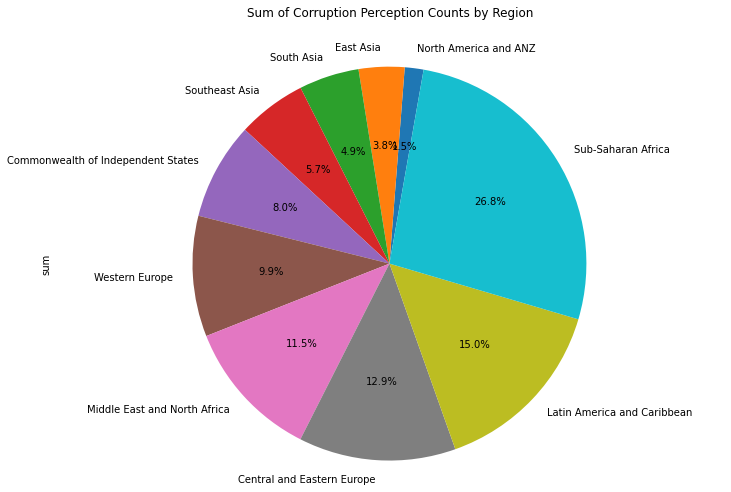

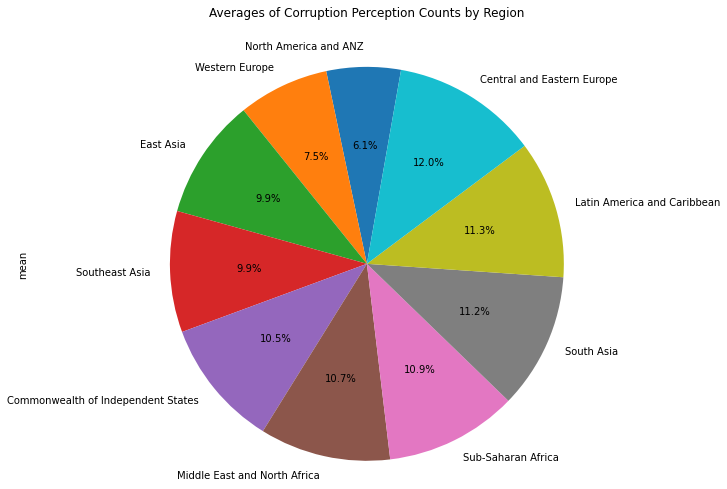

In [170]:
#exploring relationship between region and perceptions of corruption


corrupt_ratings = happydf_sort.groupby(["Ladder score", "Regional indicator"])["Perceptions of corruption"].value_counts()
corrupt_avgs = happydf_sort.groupby(["Regional indicator"])["Perceptions of corruption"].agg(['sum','mean'])



x = corrupt_avgs['sum'].sort_values()


plt.figure(figsize=(12,8))
ax = x.plot(kind = 'pie', startangle=80, autopct='%1.1f%%')
ax.set_title("Sum of Corruption Perception Counts by Region", pad=30)
ax.axis('equal')  
plt.show()


y = corrupt_avgs['mean'].sort_values()


plt.figure(figsize=(12,8))
ax = y.plot(kind = 'pie', startangle=80, autopct='%1.1f%%')
ax.set_title("Averages of Corruption Perception Counts by Region", pad=30)
ax.axis('equal')  
plt.show()




# Analysis


In [144]:
# I looked at this data from a few different angles to see if I could find any trends, specifically which factors
# played a large part in the overall happiness scores, and which did not. For the first two statistical
# summaries, I started this by looking to see the mean, min, and max life expectancies with all of 
# the data. I noticed that life expectancy seemed to be tied with social support, indicating a large importance
# on overall happiness score for the countries.I decided to look at the GDP since the happiness scores seemed to be 
# fairly consistent with the high and low GDP scores.
# This showed me that this data category might not be the most important to the overall happiness score, 
# due to the fact that the countries varied in happiness ratings consistency even with high GDP,
# so I didn't choose to investigate it further, yet it did steer me in the right direction to figuring out which
# were the greatest factors in determining the overall happiness/ladder scores and which countries to keep an
# eye out for.
#
#
#
#
# It looked like the factors that continued to play a major part in the happiness scores of the countries
# were the social support and perceptions of corruption columns. The generosity and freedom of life choices seemed
# to not have as great of an impact as they had inconsistent happiness scores when sorted low to high.
# The GDP still  didn't seem as relevant as social support and corruption perceptions.
# For this reason, I chose to look more into social support and how it impacted life expectancy and happiness. 
#
#
#
# The bar charts showed how 3 of the 5 lowest social support countries appeared on the same list as the 5 lowest 
# overall happiness scores. On the other side, 4 of the 5 countries with the highest social support appeared on
# the list with 5 highest happiness scores. This is a strong connection indicating a positive correlation to 
# happiness if social support is also high.
#
# For the next graph, I noticed how there was a major trend in percentages of corruption in specific regions. 
# I created a pie chart to help observe how percentages of corruptions could be tracked by region. Sub-Saharan 
# Africa accounted for over a quarter of the data and remained in the top 4 for regions with the highest average
# perceptions of corruption. Based on the knowledge we gained in the first bar charts, it is clear that corruption
# has a negative correlation to happiness since all but 1 of the 5 lowest happiness rated countries are in Sub-
# Saharan Africa. Western Europe, on the other hand, appear second to last in the averages of corruption
# perceptions, aligning as well with the idea that a low corruption perception leads to a higher happiness score.
#
#
# In determining the factor with the greatest impact on happiness, I'd say social support is the overall winner.
# Generosity was probably the factor that played the lowest role in determining happiness, as indicated by the 
# unpredicatable variety of high and low scores for every country, leading me to believe it isn't an 
# accurate metric to go off of, despite intuitively thinking that the two concepts are related. In addition, 
# I don't believe that there are regional differences when it comes to which factors affect happiness. It is true
# that in different places people value different things, yet according to this data it is clear that 
# the basic needs of humans remain consistent and can be measured by the data shown above when these needs aren't
# met, or are facing challenges.
#
#
#
#
#